1. Create your own implementation of `Learner` from scratch, based on the training loop shown in this chapter.
1. Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.

## Imports

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## fastai rollercoaster

Arrange float between 0..20 to time using torch.arange()

In [3]:
time = torch.arange(0,20).float()

In [4]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2+1

Define function for predictions using time and weight as parameters.

In [5]:
def f(t, weight):
    a,b,c = weight
    return a*(t**2) + (b*t) + c

Define the loss function (in this case we will use mse) using the prediction and target as parameters.

In [6]:
def mean_squared_error(prediction,targets): return ((prediction-targets)**2).mean().sqrt()

#### Step 1: Initialize the parameters

This is done by creating a variable to hold this information, in our case this will be "weight" singular.

We call the PyTorch function for providing random values torch.randm() and we want to track the gradient of these values.

In [7]:
weight = torch.randn(3).requires_grad_()

In [8]:
#hide
original_weight = weight.clone()

#### Step 2: Calculate the predictions

In [9]:
prediction = f(time, weight)

In [10]:
def show_prediction(prediction, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(prediction), color='red')
    ax.set_ylim(-300,100)

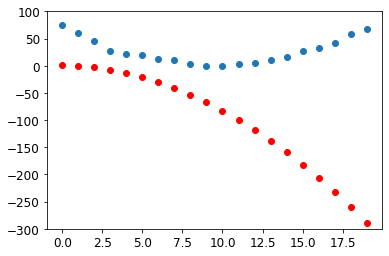

In [11]:
show_prediction(prediction)

#### Step 3: Calculate the loss

Use MSE to calculate loss using prediction and rate.

In [12]:
loss = mean_squared_error(prediction, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward>)

#### Step 4: Calculate the gradients

Use the backward function on the loss variable. Afterwards calculate gradient on the weight.

In [13]:
loss.backward()
weight.grad

tensor([-165.5151,  -10.6402,   -0.7900])

#### Step 5: Step the weights. 

In [14]:
learning_rate = 0.00001
weight.data -= learning_rate * weight.grad.data
weight.grad = None

In [15]:
prediction = f(time, weight)
mean_squared_error(prediction, speed)

tensor(160.4228, grad_fn=<SqrtBackward>)

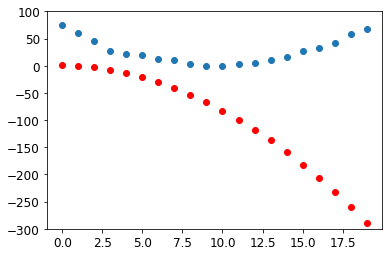

In [16]:
show_prediction(prediction)

In [17]:
def apply_step(weight, prn=True):
    prediction = f(time, weight)
    loss = mean_squared_error(weight, speed)
    loss.backward()
    weight.data -= learning_rate * weight.grad.data
    weight.data = None
    if prn: print(loss.item())
    return prediction

#### Step 6: Repeat the process 

In [18]:
for i in range(10): apply_step(weight)

RuntimeError: The size of tensor a (3) must match the size of tensor b (20) at non-singleton dimension 0

#### Step 7: stop